<a href="https://colab.research.google.com/github/bran1233/curso-machine-learning/blob/main/Python/Decision%20Trees/Titanic_lab/Lab_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Titanic - Machine Learning from Disaster</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Titanic Problem</a>  
4. <a href="#item34">Análisis y tratamiento de variables</a>  
5. <a href="#item34">Decision Tree</a>  
6. <a href="#item34">Pycaret</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión logística.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión logística.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Descargar y limpiar Dataset


Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:

# Scikit-Learn
import sklearn

# Imports comunes
import pandas as pd
import numpy as np


# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})



## Esta es la legendaria competencia Titanic ML



El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<img src="https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué tipo de personas tenían más probabilidades de sobrevivir? </div>


<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


## Descargar y limpiar Dataset


In [2]:
# Cargar Data
data = pd.read_csv("train_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<Axes: xlabel='Survived', ylabel='count'>

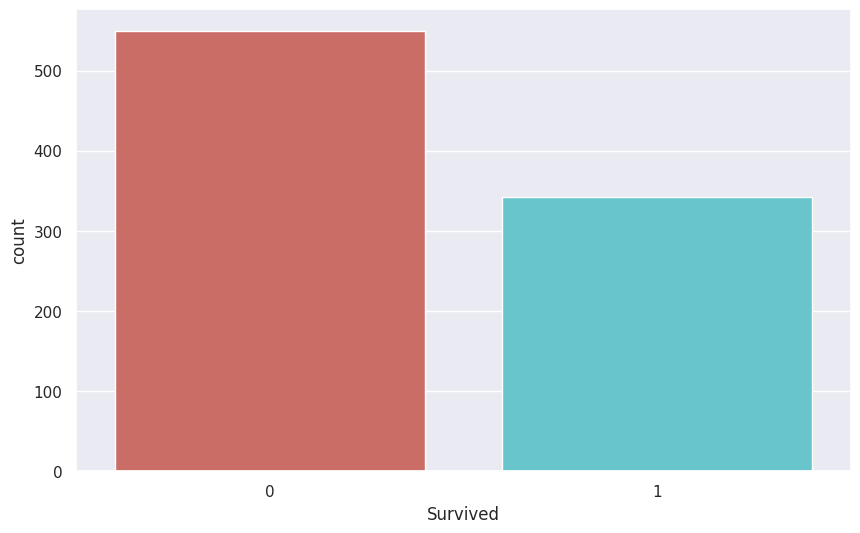

In [5]:
# Analizando el target
sns.countplot(x='Survived', data = data, palette = 'hls')

## Análisis de variables categóricas

<Axes: xlabel='Sex', ylabel='count'>

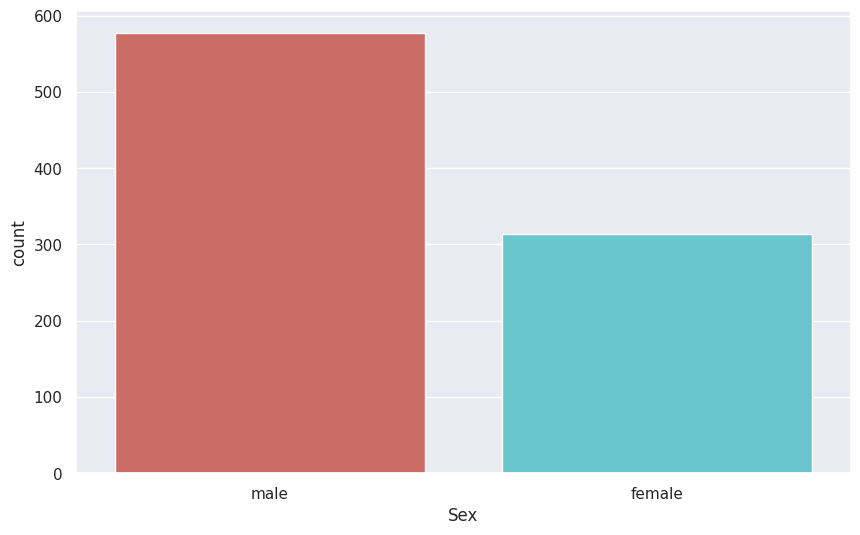

In [6]:
# Analizando variable categórica
sns.countplot(x='Sex', data = data, palette = 'hls')

In [7]:
data.groupby(['Sex']).agg({"PassengerId":"count",
                           "Survived" :"mean"}).reset_index()

,Sex,PassengerId,Survived
0,female,314,0.742038
1,male,577,0.188908


<Axes: xlabel='Sex'>

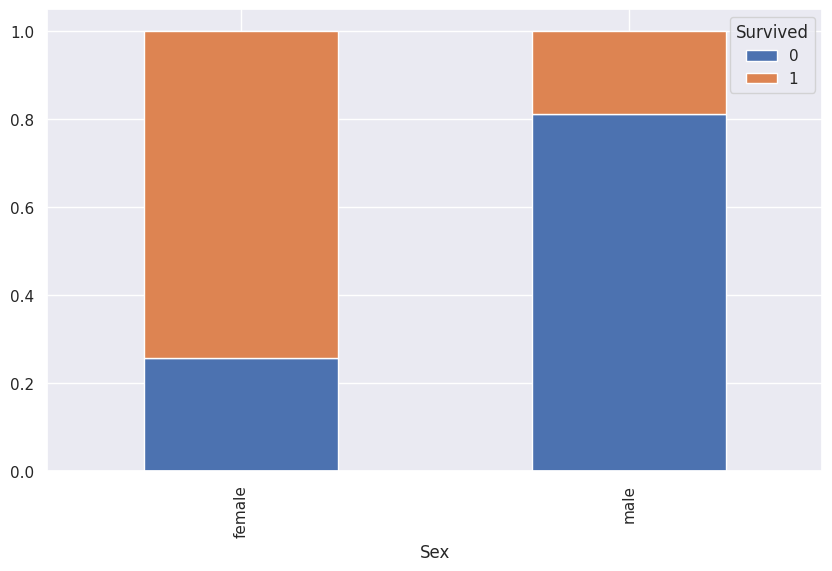

In [8]:

table = pd.crosstab(data.Sex,data.Survived)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

## Análisis de variables numéricas

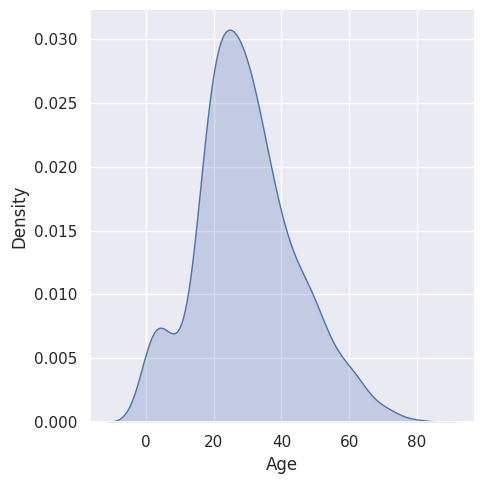

In [9]:
# Analizando variable numérica
sns.displot(data, x="Age",kind="kde", fill=True)

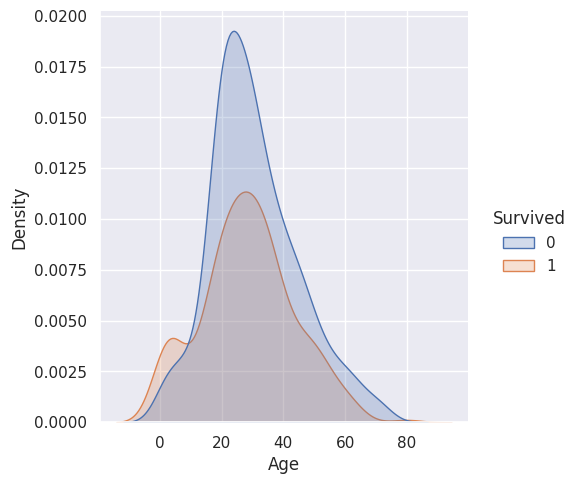

In [10]:
sns.displot(data, x="Age", hue='Survived', kind="kde", fill=True)

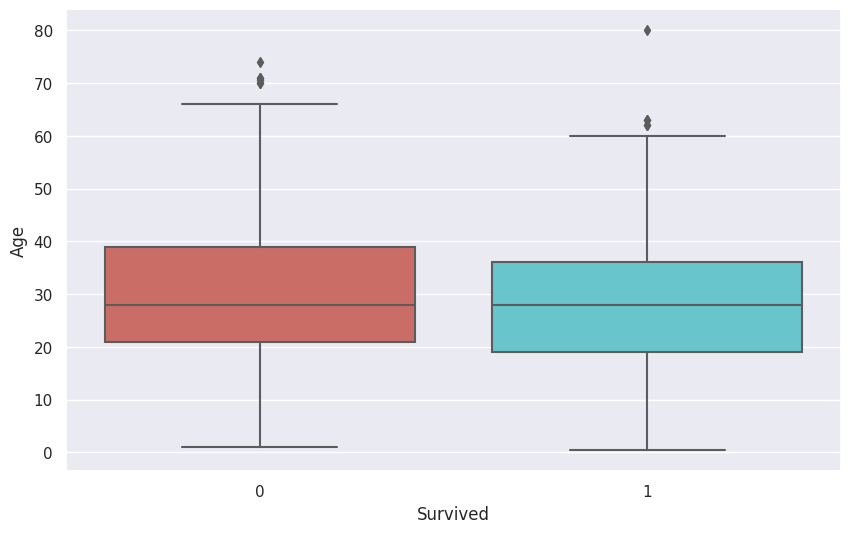

In [11]:
ax = sns.boxplot(x="Survived", y="Age", data=data, palette = 'hls')

In [12]:
data['Fare'].fillna(data['Fare'].mean())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [13]:
data['Fare'].apply(lambda x: 1 if x < 100 else 2)




0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Fare, Length: 891, dtype: int64

In [14]:
# Discretizar variable

from sklearn.preprocessing import KBinsDiscretizer

data['Fare_cat'] = KBinsDiscretizer(n_bins = 20,
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(data[['Fare']])


<ipython-input-15-c6880a08e864>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['Fare_cat'], palette = 'hls', discrete=True)


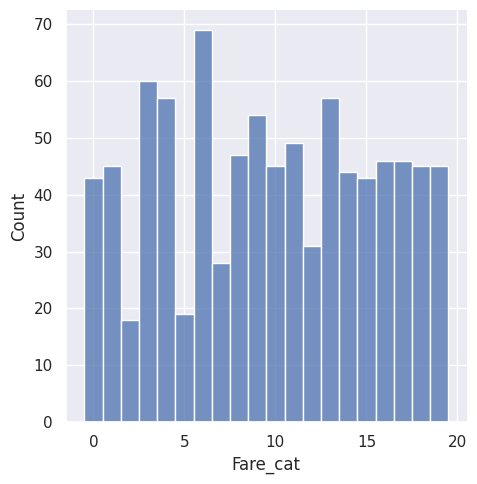

In [15]:
sns.displot(data['Fare_cat'], palette = 'hls', discrete=True)

In [16]:
data[['Fare', 'Fare_cat', 'Survived']]

,Fare,Fare_cat,Survived
0,7.2500,1.0,0
1,71.2833,17.0,1
2,7.9250,5.0,1
3,53.1000,16.0,1
4,8.0500,6.0,0
...,...,...,...
886,13.0000,9.0,0
887,30.0000,14.0,1
888,23.4500,12.0,0
889,30.0000,14.0,1


In [17]:
aggregations = {'Survived':'mean', 'Fare':'min', 'Fare':'max'}
res = data.groupby('Fare_cat').agg(aggregations).reset_index()
res

,Fare_cat,Survived,Fare
0,0.0,0.069767,7.1417
1,1.0,0.200000,7.5208
2,2.0,0.277778,7.7417
3,3.0,0.316667,7.8292
4,4.0,0.140351,7.8958
5,5.0,0.473684,8.0292
6,6.0,0.130435,8.8500
7,7.0,0.178571,10.4625
8,8.0,0.489362,12.8750
9,9.0,0.388889,14.4000


<ipython-input-18-39cb95cb82d7>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x="Fare_cat", y="Survived", palette = 'hls')


<Axes: xlabel='Fare_cat', ylabel='Survived'>

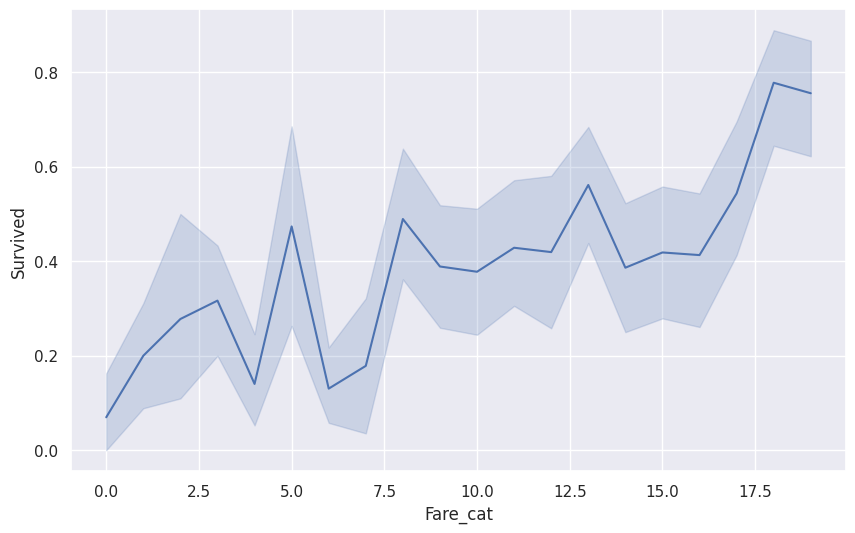

In [18]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Fare_cat", y="Survived", palette = 'hls')

## Decision Tree

In [19]:
data = pd.read_csv("train_titanic.csv")

In [20]:

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

In [21]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [22]:
 # Installar category_encoders
 !pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [23]:
# Target Encoding
from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])


In [30]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_t,Fare_t,SibSp_t,Parch_t,Pclass_num,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,7.2500,1,0,3,0.188908,0.336957
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,71.2833,1,0,1,0.742038,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,7.9250,0,0,3,0.742038,0.336957
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,53.1000,1,0,1,0.742038,0.336957
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,8.0500,0,0,3,0.188908,0.336957


In [24]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [25]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [26]:
len(X_train)

623

In [27]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = 30,
                               random_state = 123)


In [28]:
# Entrenamos el modelo

dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, random_state=123)

In [29]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [31]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = dtree.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = dtree.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [32]:
X_train[['prediction','probability']]

,prediction,probability
416,1,1.000000
801,1,1.000000
512,0,0.476190
455,0,0.200000
757,0,0.079268
...,...,...
98,1,0.878049
322,1,0.878049
382,0,0.150538
365,0,0.150538


In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsDtree

## Análsisis de datos con Pycaret

In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret[full]

In [ ]:
from pycaret.utils import version
version()

In [ ]:
import numpy as np
from pycaret.utils import enable_colab
enable_colab()

In [ ]:
data = pd.read_csv("train_titanic.csv")

In [ ]:
base_train = data.sample(frac = 0.8, random_state=1)
base_train.shape

(713, 12)

In [ ]:
from pycaret.classification import setup
experimento = setup(data = base_train, target = 'Survived',
                    ignore_features = ['ID', 'ID_Days'], session_id=123)

In [ ]:
from pycaret.classification import compare_models
modelos = compare_models(sort = 'AUC', fold = 5)

In [ ]:
from pycaret.classification import create_model
dt = create_model('dt', fold = 5)

In [ ]:
from pycaret.classification import plot_model
plot_model(dt, plot="tree", scale = 0.6)

# Tune Model

In [ ]:
from pycaret.classification import tune_model
tuned_dt = tune_model(dt, optimize = 'AUC')

In [ ]:
print(tuned_dt)

In [ ]:
from pycaret.classification import plot_model
plot_model(tuned_dt, plot="tree", scale = 0.6)

# Analyze Model

In [ ]:
from pycaret.classification import plot_model

In [ ]:
plot_model(tuned_dt, plot='feature')

In [ ]:
plot_model(tuned_dt)

In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [ ]:
plot_model(tuned_dt, plot = 'threshold')

In [ ]:
plot_model(tuned_dt, plot = 'pr')

In [ ]:
plot_model(tuned_dt, plot = 'vc')

In [ ]:
plot_model(tuned_dt, plot = 'boundary')

In [ ]:
from pycaret.classification import evaluate_model
evaluate_model(tuned_dt)

### Gracias por completar este laboratorio!

---

